In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [295]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [296]:
df.shape

(699, 11)

In [297]:
df.size

7689

In [298]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [300]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [301]:
df.duplicated().sum()

np.int64(8)

In [302]:
df.drop_duplicates(inplace = True)

In [303]:
df.shape

(691, 11)

In [304]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [305]:
df['Class'].value_counts()

Class
2    453
4    238
Name: count, dtype: int64

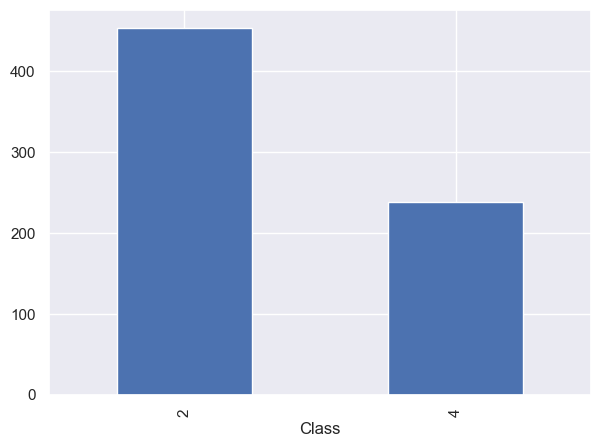

In [306]:
df['Class'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.show()

In [307]:
df_benign = df[df['Class'] == 2]
df_malignant = df[df['Class'] == 4]

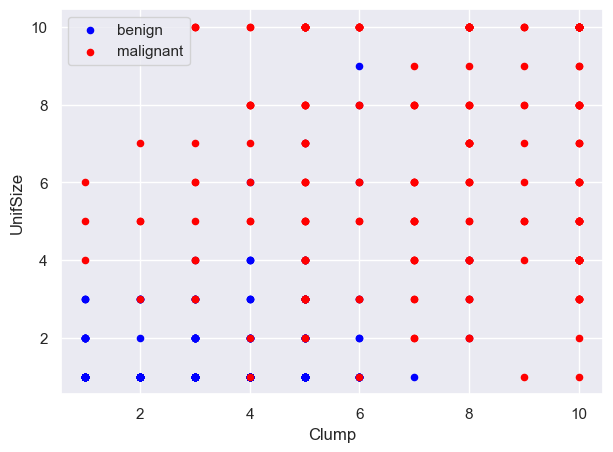

In [308]:
axes = df_benign.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'blue', label = 'benign', figsize = (7, 5))
df_malignant.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'red', label = 'malignant', ax = axes)
plt.show()

In [309]:
df['Class'] = df['Class'].replace({2: 'benign', 4: 'malignant'})

In [310]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [311]:
def scatter_plot(x, y, h):
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = df, x = x, y = y, hue = h)
    plt.show()

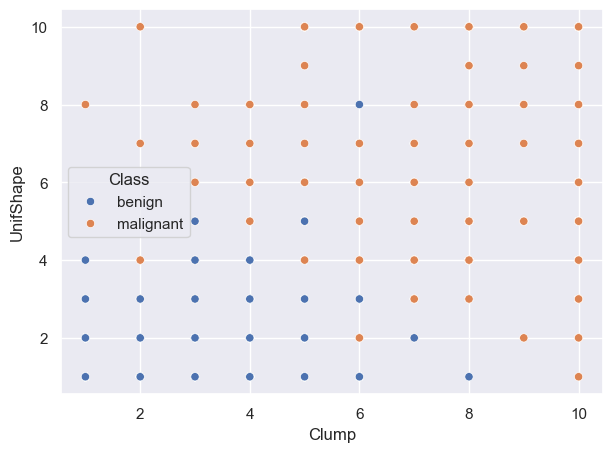

In [312]:
scatter_plot('Clump', 'UnifShape', 'Class')

In [313]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class          object
dtype: object

In [314]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors = 'coerce', )

In [315]:
df.dtypes

ID               int64
Clump            int64
UnifSize         int64
UnifShape        int64
MargAdh          int64
SingEpiSize      int64
BareNuc        float64
BlandChrom       int64
NormNucl         int64
Mit              int64
Class           object
dtype: object

In [316]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [317]:
df.isnull().sum()

ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [318]:
df.dropna(subset = ['BareNuc'], inplace = True)

In [319]:
df.apply(pd.isnull).sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [320]:
df.shape

(675, 11)

In [321]:
X = df.drop(columns = ['ID', 'Class'], axis = 1)
y = df['Class']

In [322]:
X

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [323]:
X.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
dtype: int64

In [324]:
X = np.asarray(X)

In [325]:
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [326]:
y

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: Class, Length: 675, dtype: object

In [327]:
le = LabelEncoder()

In [328]:
y_le = le.fit_transform(y)

In [329]:
y_le[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size = 0.2, random_state = 4, stratify = y_le, shuffle = True)

In [331]:
print('The shape of training set is:', X_train.shape)
print('The shape of test set is:', X_test.shape)

The shape of training set is: (540, 9)
The shape of test set is: (135, 9)


In [332]:
model_linear = SVC(kernel = 'linear')

In [333]:
param_grid_linear = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [334]:
grid_linear = GridSearchCV(estimator = model_linear, param_grid = param_grid_linear, cv = 5)

In [335]:
grid_linear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [336]:
grid_linear.best_params_

{'C': 0.01}

In [337]:
grid_linear.best_estimator_

SVC(C=0.01, kernel='linear')

In [338]:
print('The validation accuracy is:', grid_linear.best_score_)

The validation accuracy is: 0.9759259259259258


In [339]:
linear_preds = grid_linear.predict(X_test)

In [341]:
print(classification_report(y_test, linear_preds))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        88
           1       0.88      0.98      0.93        47

    accuracy                           0.95       135
   macro avg       0.94      0.96      0.94       135
weighted avg       0.95      0.95      0.95       135



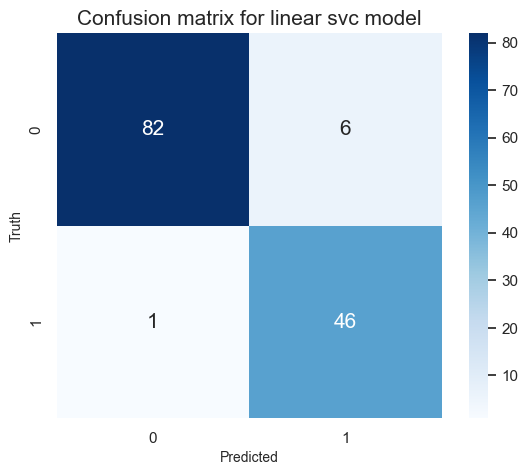

In [342]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, linear_preds), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion matrix for linear svc model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [343]:
model_rbf = SVC(kernel = 'rbf')

In [344]:
rbf_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [345]:
grid_rbf = GridSearchCV(estimator = model_rbf, param_grid = rbf_params, cv = 5)

In [346]:
grid_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [347]:
grid_rbf.best_params_

{'C': 1, 'gamma': 0.01}

In [349]:
grid_rbf.best_estimator_

SVC(C=1, gamma=0.01)

In [350]:
print('The validation accuracy of rbf svm model is:', grid_rbf.best_score_)

The validation accuracy of rbf svm model is: 0.9796296296296296


In [351]:
rbf_preds = grid_rbf.predict(X_test)

In [352]:
print(classification_report(y_test, rbf_preds))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        88
           1       0.88      0.98      0.93        47

    accuracy                           0.95       135
   macro avg       0.94      0.96      0.94       135
weighted avg       0.95      0.95      0.95       135



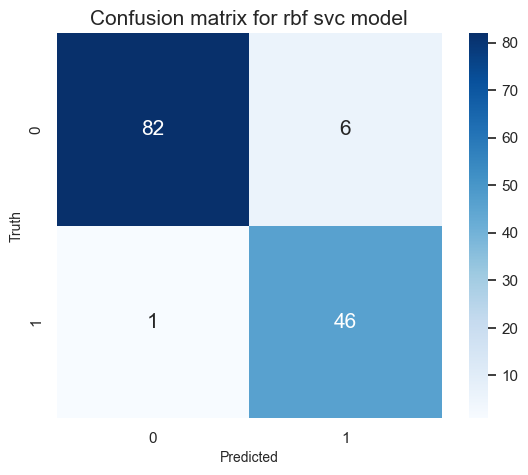

In [353]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, rbf_preds), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', 
            cmap = 'Blues')
plt.title('Confusion matrix for rbf svc model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [354]:
poly_model = SVC(kernel = 'poly')

In [355]:
poly_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [356]:
grid_poly = GridSearchCV(estimator = poly_model, param_grid = poly_param, cv = 5)

In [357]:
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [358]:
grid_poly.best_params_

{'C': 1}

In [359]:
grid_poly.best_estimator_

SVC(C=1, kernel='poly')

In [360]:
print('The validation accuracy for poly svc model is:', grid_poly.best_score_)

The validation accuracy for poly svc model is: 0.9722222222222223


In [361]:
poly_preds = grid_poly.predict(X_test)

In [364]:
print(classification_report(y_test, poly_preds))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.88      0.96      0.92        47

    accuracy                           0.94       135
   macro avg       0.93      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135



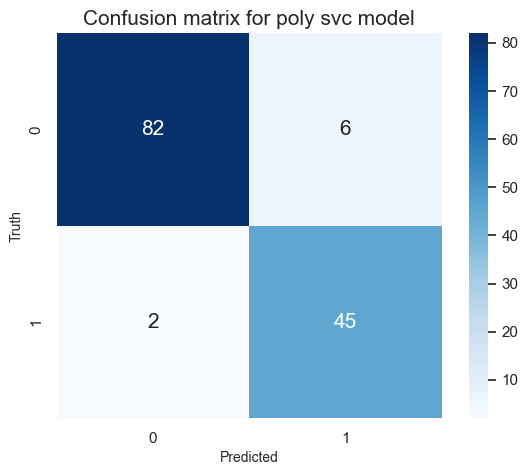

In [365]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, poly_preds), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion matrix for poly svc model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [366]:
sigmoid_model = SVC(kernel = 'sigmoid')

In [367]:
sigmoid_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [368]:
sigmoid_grid = GridSearchCV(estimator = sigmoid_model, param_grid = sigmoid_params, cv = 5)

In [369]:
sigmoid_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [370]:
sigmoid_grid.best_params_

{'C': 0.001}

In [371]:
sigmoid_grid.best_estimator_

SVC(C=0.001, kernel='sigmoid')

In [372]:
print('The validation accuracy for sigmoid svc kernel is:', sigmoid_grid.best_score_)

The validation accuracy for sigmoid svc kernel is: 0.65


In [373]:
sigmoid_preds = sigmoid_grid.predict(X_test)

In [374]:
print(classification_report(y_test, sigmoid_preds))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        88
           1       0.00      0.00      0.00        47

    accuracy                           0.65       135
   macro avg       0.33      0.50      0.39       135
weighted avg       0.42      0.65      0.51       135



C:\Users\loptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\loptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\loptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.

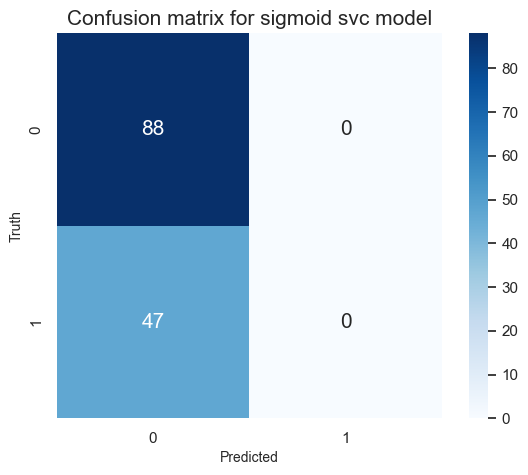

In [375]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, sigmoid_preds), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion matrix for sigmoid svc model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()